In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import sep
import math
import keras
from keras.utils import np_utils
from keras.models import load_model

import numpy as np
from astropy.io import fits

import random 
import aplpy


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

np.random.seed(123)  # for reproducibility

Using TensorFlow backend.


DOWNLOADING CNN MODEL 

In [2]:
model = load_model("NNdouble.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [3]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 21, 21)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 21, 21)       0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 21, 64)       1408        input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 21, 64)       1408        input_2[0][0]                    
____________________________________________________________________________________________

DOWNLOADING DATA

In [4]:
data_galaxy = np.load('datasets/galaxy_ic4559_images_scaled.npy')
labels_galaxy = np.load('datasets/galaxy_ic4559_labels_scaled.npy')

PREDICTION

In [5]:
def prediction (data, labels):
    dataA = data[:,:,:,0]
    dataB = data[:,:,:,1]
    labels_predict = model.predict([dataA,dataB])
    labels_predict2 = np.argmax(labels_predict, axis=-1)
    
    metrics = []
    
    metrics.append(accuracy_score(labels, labels_predict2))
    metrics.append(precision_score(labels, labels_predict2))
    metrics.append(recall_score(labels, labels_predict2))
    metrics.append(f1_score(labels, labels_predict2))
    
    acc = accuracy_score(labels, labels_predict2)
    conf_mat = confusion_matrix(labels, labels_predict2)
    
    return metrics, conf_mat

In [6]:
dataA = data_galaxy[:,:,:,0]
dataB = data_galaxy[:,:,:,1]

labels_predict = model.predict([dataA,dataB])

In [7]:
labels_predict2 = np.argmax(labels_predict, axis=-1)

In [8]:
accuracy_score(labels_galaxy, labels_predict2)

0.99375

In [9]:
confusion_matrix(labels_galaxy, labels_predict2)

array([[317,   3],
       [  1, 319]])

In [21]:
acc, mat = prediction(data_galaxy, labels_galaxy)
print(mat,acc)

[[317   3]
 [  1 319]] 0.99375


In [6]:
data_galaxy_pgc21577 = np.load('datasets/galaxy_pgc21577_images_scaled.npy')
labels_galaxy_pgc21577 = np.load('datasets/galaxy_pgc21577_labels_scaled.npy')
accuracy2, matrix2 = prediction(data_galaxy_pgc21577, labels_galaxy_pgc21577)
print(matrix2,accuracy2)

[[387  23]
 [  5 405]] [0.9658536585365853, 0.9462616822429907, 0.9878048780487805, 0.9665871121718377]


In [7]:
data_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_images_scaled.npy')
labels_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_labels_scaled.npy')
accuracy3, matrix3 = prediction(data_galaxy_pgc21708, labels_galaxy_pgc21708)
print(matrix3,accuracy3)


[[331  15]
 [  5 341]] [0.9710982658959537, 0.9578651685393258, 0.9855491329479769, 0.9715099715099714]


In [8]:
data_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_images_scaled.npy')
labels_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_labels_scaled.npy')
accuracy4, matrix4 = prediction(data_galaxy_pgc21747, labels_galaxy_pgc21747)
print(matrix4, accuracy4)

[[296  32]
 [  0 328]] [0.9512195121951219, 0.9111111111111111, 1.0, 0.9534883720930233]


In [9]:
data_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_images_scaled.npy')
labels_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_labels_scaled.npy')
accuracy5, matrix5 = prediction(data_galaxy_pgc21856, labels_galaxy_pgc21856)
print(matrix5, accuracy5)

[[264  17]
 [  2 279]] [0.9661921708185054, 0.9425675675675675, 0.9928825622775801, 0.9670710571923743]


In [10]:
def merging_datasets(d1,l1,d2,l2,d3,l3,d4,l4,d5,l5):
    
           
    dataset = np.append(d1,d2, axis=0)
    dataset2 = np.append(dataset,d3, axis=0)
    dataset3 = np.append(dataset2,d4, axis=0)
    dataset4 = np.append(dataset3,d5, axis=0)

    labels = np.append(l1,l2, axis=0)
    labels2 = np.append(labels,l3, axis=0)
    labels3 = np.append(labels2,l4, axis=0)
    labels4 = np.append(labels3,l5, axis=0)
    
    
    return dataset4, labels4

In [11]:
data, lab = merging_datasets(data_galaxy, labels_galaxy, data_galaxy_pgc21577, labels_galaxy_pgc21577, data_galaxy_pgc21708, labels_galaxy_pgc21708, data_galaxy_pgc21747, labels_galaxy_pgc21747, data_galaxy_pgc21856, labels_galaxy_pgc21856)

In [16]:
print(prediction(data, lab))

([0.9694362017804155, 0.9489216799091941, 0.9922848664688427, 0.9701189440092833], array([[1595,   90],
       [  13, 1672]]))


In [30]:
data.shape

(3370, 21, 21, 2)

In [12]:
dataA = data[:,:,:,0]
dataB = data[:,:,:,1]
labels_predict = model.predict([dataA,dataB])

In [21]:
labels_predict.shape
labels_predict2 = np.argmax(labels_predict, axis=-1)

In [18]:
lab2 = np_utils.to_categorical(lab)

(array([1685.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1685.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <a list of 50 Patch objects>)

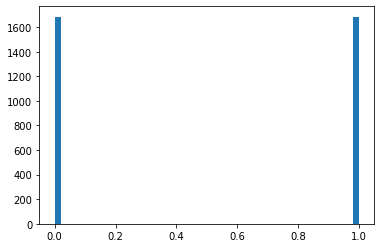

In [19]:
plt.hist(lab2[:,0], bins = 50)

(array([1685.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1685.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <a list of 50 Patch objects>)

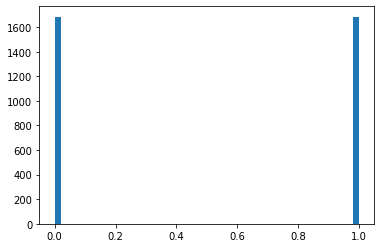

In [20]:
plt.hist(lab2[:,1], bins = 50)

(array([1.747e+03, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        5.000e+00, 1.593e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <a list of 5

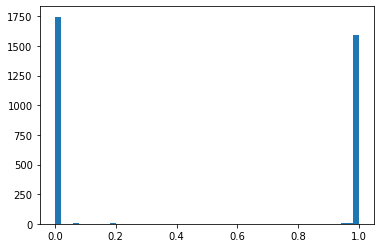

In [16]:
plt.hist(labels_predict[:,0], bins = 50)

(array([1.593e+03, 5.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.747e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <a list of 5

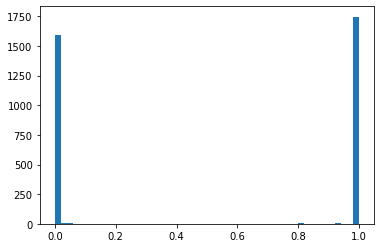

In [15]:
plt.hist(labels_predict[:,1], bins = 50)

In [41]:
for i in range(len(lab)):
    if lab[i]!=labels_predict2[i]:
        print(i)
        print(lab[i])

28
0.0
295
0.0
314
0.0
528
1.0
642
0.0
643
0.0
656
0.0
657
0.0
663
0.0
667
0.0
674
0.0
680
0.0
686
0.0
717
0.0
744
0.0
766
0.0
769
0.0
818
0.0
828
0.0
839
0.0
842
0.0
843
0.0
847
0.0
858
0.0
866
0.0
887
0.0
1024
0.0
1205
1.0
1309
1.0
1364
1.0
1383
1.0
1398
1.0
1466
0.0
1489
0.0
1495
0.0
1525
0.0
1531
0.0
1562
0.0
1577
0.0
1597
0.0
1639
0.0
1745
0.0
1788
0.0
1792
0.0
1793
0.0
1794
0.0
1804
0.0
1829
1.0
1889
1.0
1952
1.0
2033
1.0
2134
1.0
2154
0.0
2156
0.0
2157
0.0
2159
0.0
2164
0.0
2166
0.0
2170
0.0
2172
0.0
2185
0.0
2187
0.0
2195
0.0
2200
0.0
2201
0.0
2207
0.0
2209
0.0
2213
0.0
2219
0.0
2222
0.0
2224
0.0
2227
0.0
2228
0.0
2237
0.0
2240
0.0
2299
0.0
2405
0.0
2436
0.0
2437
0.0
2441
0.0
2449
0.0
2452
0.0
2457
0.0
2478
0.0
2814
0.0
2816
0.0
2819
0.0
2820
0.0
2822
0.0
2846
0.0
2878
0.0
2895
0.0
2959
0.0
2987
0.0
3010
0.0
3022
0.0
3052
0.0
3063
0.0
3064
0.0
3066
0.0
3086
0.0
3132
1.0
3226
1.0


In [52]:
lab[3052]

0.0

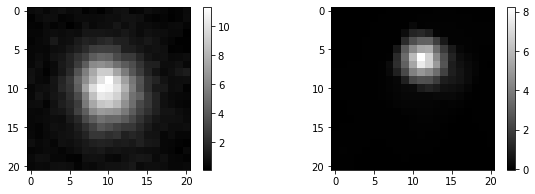

In [53]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)    
fig_1 = ax.imshow(data[3052,:,:,0], cmap='gray')
fig_2 = ax2.imshow(data[3052,:,:,1], cmap='gray')

f.colorbar(fig_1, ax=ax)
f.colorbar(fig_2, ax=ax2)

plt.savefig('pictures/NNerror2.png')

In [46]:
labels_predict2[528]

0